# Read data

In [2]:
import pyforest
import pathlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
df = pd.read_csv("sumSS.csv")
df

,name,Tc,H,He,Li,Be,B,C,N,O,...,Mt,Ds,Rg,Cn,Nh,Fl,Mc,Lv,Ts,Og
0,Hg0.66Pb0.34Ba2Ca1.98Cu2.9O8.4,143.000000,0.0,0,0.0,0.0,0.0,0.0,0.0,0.515971,...,0,0,0,0,0,0,0,0,0,0
1,Hg0.75Ba2.07Ca2.07Cu3.11O8.208,135.800000,0.0,0,0.0,0.0,0.0,0.0,0.0,0.506417,...,0,0,0,0,0,0,0,0,0,0
2,Hg0.75Ba2.07Ca2.07Cu3.11O8.187,135.400000,0.0,0,0.0,0.0,0.0,0.0,0.0,0.505776,...,0,0,0,0,0,0,0,0,0,0
3,Hg1Ba2Ca2Cu3O8.29,135.000000,0.0,0,0.0,0.0,0.0,0.0,0.0,0.508901,...,0,0,0,0,0,0,0,0,0,0
4,Hg1Ba2Ca2Cu3O8.27,135.000000,0.0,0,0.0,0.0,0.0,0.0,0.0,0.508297,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12410,Ag0.9Ga0.1,0.006500,0.0,0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0,0,0,0,0,0,0,0,0,0
12411,Pt1,0.004157,0.0,0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0,0,0,0,0,0,0,0,0,0
12412,La1.92Sr0.08Cu0.99Ni0.01O4,0.001000,0.0,0,0.0,0.0,0.0,0.0,0.0,0.571429,...,0,0,0,0,0,0,0,0,0,0
12413,Gd0.9Pr0.95Ce0.15Cu1O4,0.001000,0.0,0,0.0,0.0,0.0,0.0,0.0,0.571429,...,0,0,0,0,0,0,0,0,0,0


In [3]:
from sklearn.model_selection import train_test_split
X = df.iloc[:,2:].values
Y = df.iloc[:,1].values
X_train,X_test,y_train,y_test =train_test_split(X,Y,test_size=0.2) 

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_transform = sc.fit_transform(X_train)
sc2 = StandardScaler()
from sklearn.preprocessing import MinMaxScaler
Y_transform = y_train

In [4]:
## Extract the DNN model
import time
saved_model_path = "./path_to_dnn.th"
new_model = tf.keras.experimental.load_from_saved_model(saved_model_path)
new_model.summary()
model = new_model

Model: "sequential_889"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_889 (Flatten)        (None, 118)               0         
_________________________________________________________________
dense_4804 (Dense)           (None, 256)               30464     
_________________________________________________________________
dense_4805 (Dense)           (None, 252)               64764     
_________________________________________________________________
dense_4806 (Dense)           (None, 217)               54901     
_________________________________________________________________
dense_4807 (Dense)           (None, 61)                13298     
_________________________________________________________________
dense_4808 (Dense)           (None, 1)                 62        
Total params: 163,489
Trainable params: 163,489
Non-trainable params: 0
______________________________________________

#  Hg

In [8]:
x = np.arange(1,250,5)
x= x/1000
x = list(x)
#print(x)


jilumax=[]
jilumin=[]

for i  in  x :   
    datat = pd.read_csv(r"path_to_Hg/"+str(i)+"/out.csv",header=None,engine="python")
    t = datat.iloc[1:,:-1]
    t = sc.transform(t)
    clf_t_train = model.predict(t)
    maxx = clf_t_train.max()
    minn = clf_t_train.min()
    jilumax.append(maxx)
    jilumin.append(minn)
    print("Hg",i,"The max Tc is",maxx,"Min is",minn)

Hg 0.001 The max Tc is 128.68138 Min is 0.2156589
Hg 0.006 The max Tc is 129.22835 Min is 0.40042913
Hg 0.011 The max Tc is 129.8985 Min is 0.4337355
Hg 0.016 The max Tc is 129.89053 Min is 0.57821333
Hg 0.021 The max Tc is 130.54282 Min is 0.68797004
Hg 0.026 The max Tc is 130.9363 Min is 0.72803485
Hg 0.031 The max Tc is 131.48656 Min is 0.71086204
Hg 0.036 The max Tc is 130.84464 Min is 0.74275935
Hg 0.041 The max Tc is 131.14745 Min is 0.7765051
Hg 0.046 The max Tc is 131.94438 Min is 0.79914343
Hg 0.051 The max Tc is 133.38576 Min is 0.81952274
Hg 0.056 The max Tc is 134.82991 Min is 0.8138994
Hg 0.061 The max Tc is 136.1888 Min is 0.829131
Hg 0.066 The max Tc is 137.56718 Min is 0.8829994
Hg 0.071 The max Tc is 139.09918 Min is 0.9195491
Hg 0.076 The max Tc is 140.4647 Min is 0.94621974
Hg 0.081 The max Tc is 141.66283 Min is 1.0367732
Hg 0.086 The max Tc is 142.73402 Min is 1.1064045
Hg 0.091 The max Tc is 144.16751 Min is 1.3734922
Hg 0.096 The max Tc is 146.04643 Min is 1.8014

In [95]:
    
fig = plt.gcf( )
line1, = plt.plot(x,jilumax, '-*', label = 'Hg - High')
line2, = plt.plot(x,jilumin, '-.', label = 'Hg - Low')
plt.legend(loc="best",fontsize=15)
plt.fill_between(x, jilumax, jilumin, facecolor="orangered",alpha=0.2)
fig.set_size_inches(9.5, 5.5)
plt.xlim((x[0], x[-1]))
plt.ylim((0, 160))
plt.grid()

plt.savefig('Hgfill.png',dpi=300)
plt.show()

Hg 0.001 The max Tc is 129.11511 Min is 0.18557465
Hg 0.006 The max Tc is 129.7644 Min is 0.24021232
Hg 0.011 The max Tc is 130.4655 Min is 0.2582121
Hg 0.016 The max Tc is 130.5014 Min is 0.46663237
Hg 0.021 The max Tc is 131.20088 Min is 0.5589851
Hg 0.026 The max Tc is 131.62692 Min is 0.58974874
Hg 0.031 The max Tc is 132.19514 Min is 0.6476203
Hg 0.036 The max Tc is 131.41452 Min is 0.6420318
Hg 0.041 The max Tc is 131.74374 Min is 0.6582869
Hg 0.046 The max Tc is 133.23026 Min is 0.73017466
Hg 0.051 The max Tc is 134.75404 Min is 0.7251729
Hg 0.056 The max Tc is 136.23422 Min is 0.7521546
Hg 0.061 The max Tc is 137.66866 Min is 0.7658187
Hg 0.066 The max Tc is 139.12367 Min is 0.7778541
Hg 0.071 The max Tc is 140.74942 Min is 0.8870536
Hg 0.076 The max Tc is 142.09624 Min is 0.9179998
Hg 0.081 The max Tc is 143.16443 Min is 1.0462836
Hg 0.086 The max Tc is 144.67549 Min is 1.2803543
Hg 0.091 The max Tc is 146.94478 Min is 1.7331861
Hg 0.096 The max Tc is 148.35843 Min is 2.391193

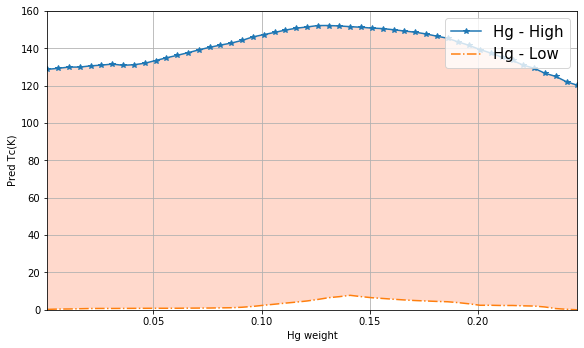

In [9]:
fig = plt.gcf( )
line1, = plt.plot(x,jilumax, '-*', label = 'Hg - High')
line2, = plt.plot(x,jilumin, '-.', label = 'Hg - Low')
plt.legend(loc="upper right",fontsize=15)
plt.fill_between(x, jilumax, jilumin, facecolor="orangered",alpha=0.2)
fig.set_size_inches(9.5, 5.5)
plt.xlabel("Hg weight")
plt.ylabel("Pred Tc(K)")
plt.xlim((x[0], x[-1]))
plt.ylim((0, 160))
plt.grid()

plt.savefig('Hgfill.png',dpi=300,bbox_inches="tight")
plt.show()

# Pb

In [11]:
x = np.arange(90,340,5)
x= x/1000
x = list(x)
jilumax=[]
jilumin=[]

for i  in  x :   
    datat = pd.read_csv(r"./Pb/"+str(i)+"Pb./out.csv",header=None,engine="python")
    t = datat.iloc[1:,:-1]
    t = sc.transform(t)
    clf_t_train = model.predict(t)
    maxx = clf_t_train.max()
    minn = clf_t_train.min()
    jilumax.append(maxx)
    jilumin.append(minn)
    print("Pb",i,"The max Tc is",maxx,"Min is",minn)

Pb 0.09 The max Tc is 152.16902 Min is 0.03593266
Pb 0.095 The max Tc is 151.05069 Min is 0.0
Pb 0.1 The max Tc is 149.546 Min is 0.40460658
Pb 0.105 The max Tc is 148.62518 Min is 0.62299156
Pb 0.11 The max Tc is 147.9516 Min is 0.7548717
Pb 0.115 The max Tc is 147.31964 Min is 1.0412787
Pb 0.12 The max Tc is 146.75916 Min is 1.0615194
Pb 0.125 The max Tc is 146.2196 Min is 1.1325493
Pb 0.13 The max Tc is 145.60757 Min is 1.1602623
Pb 0.135 The max Tc is 144.90558 Min is 1.6380137
Pb 0.14 The max Tc is 144.28596 Min is 2.1873312
Pb 0.145 The max Tc is 143.7556 Min is 2.7595737
Pb 0.15 The max Tc is 143.3374 Min is 3.3937712
Pb 0.155 The max Tc is 143.1039 Min is 4.3748064
Pb 0.16 The max Tc is 142.13174 Min is 5.1370115
Pb 0.165 The max Tc is 141.63297 Min is 5.8220677
Pb 0.17 The max Tc is 141.13234 Min is 6.407242
Pb 0.175 The max Tc is 140.60507 Min is 6.6942763
Pb 0.18 The max Tc is 139.62267 Min is 7.0794644
Pb 0.185 The max Tc is 139.27705 Min is 7.4451776
Pb 0.19 The max Tc is 

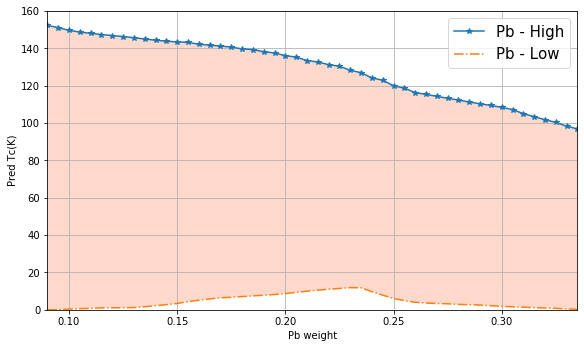

In [13]:
    
fig = plt.gcf( )
line1, = plt.plot(x,jilumax, '-*', label = 'Pb - High')
line2, = plt.plot(x,jilumin, '-.', label = 'Pb - Low')
plt.legend(loc="upper right",fontsize=15)
plt.fill_between(x, jilumax, jilumin, facecolor="orangered",alpha=0.2)
fig.set_size_inches(9.5, 5.5)
plt.xlim((x[0], x[-1]))
plt.ylim((0, 160))
plt.xlabel("Pb weight")  
plt.ylabel("Pred Tc(K)")
plt.grid()

plt.savefig('Pbfill.png',dpi=300,bbox_inches="tight")
plt.show()

# Ba


In [14]:
x = np.arange(1,300,6)
x= x/1000
x = list(x)
jilumax=[]
jilumin=[]

for i  in  x :   
    datat = pd.read_csv(r"./Ba/"+str(i)+"Ba./out.csv",header=None,engine="python")
    t = datat.iloc[1:,:-1]
    t = sc.transform(t)
    clf_t_train = model.predict(t)
    maxx = clf_t_train.max()
    minn = clf_t_train.min()
    jilumax.append(maxx)
    jilumin.append(minn)
    print("Ba",i,"The max Tc is",maxx,"Min is",minn)

Ba 0.001 The max Tc is 92.36452 Min is 0.0
Ba 0.007 The max Tc is 92.66289 Min is 0.0
Ba 0.013 The max Tc is 92.92392 Min is 0.0
Ba 0.019 The max Tc is 93.21794 Min is 0.0
Ba 0.025 The max Tc is 93.36217 Min is 0.29558885
Ba 0.031 The max Tc is 95.293015 Min is 0.52296746
Ba 0.037 The max Tc is 97.91776 Min is 0.59954524
Ba 0.043 The max Tc is 100.011665 Min is 0.8140551
Ba 0.049 The max Tc is 101.50151 Min is 1.0397587
Ba 0.055 The max Tc is 102.400635 Min is 0.9814179
Ba 0.061 The max Tc is 105.346115 Min is 1.1528012
Ba 0.067 The max Tc is 108.141205 Min is 1.4821285
Ba 0.073 The max Tc is 109.843414 Min is 1.5504599
Ba 0.079 The max Tc is 111.05214 Min is 1.5461687
Ba 0.085 The max Tc is 111.05022 Min is 1.5301613
Ba 0.091 The max Tc is 110.56377 Min is 1.524706
Ba 0.097 The max Tc is 110.06303 Min is 1.5219766
Ba 0.103 The max Tc is 111.041595 Min is 1.5333633
Ba 0.109 The max Tc is 112.902756 Min is 1.5192125
Ba 0.115 The max Tc is 114.76861 Min is 1.4719076
Ba 0.121 The max Tc i

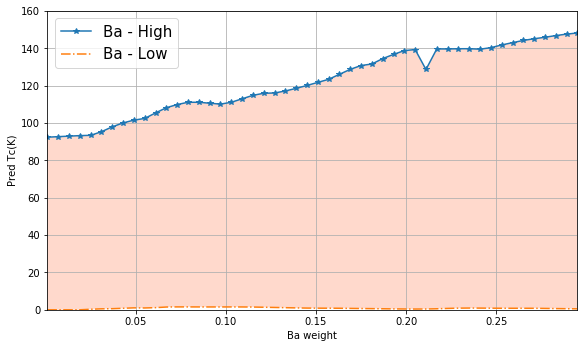

In [15]:
fig = plt.gcf( )
line1, = plt.plot(x,jilumax, '-*', label = 'Ba - High')
line2, = plt.plot(x,jilumin, '-.', label = 'Ba - Low')
plt.legend(loc="best",fontsize=15)
plt.fill_between(x, jilumax, jilumin, facecolor="orangered",alpha=0.2)
fig.set_size_inches(9.5, 5.5)
plt.xlim((x[0], x[-1]))
plt.ylim((0, 160))
plt.grid()
plt.xlabel("Ba weight")
plt.ylabel("Pred Tc(K)")

plt.savefig('Bafill.png',dpi=300,bbox_inches="tight")
plt.show()

In [ ]:
#print(x)
x = [0.37,0.38,0.39,0.40,0.41,0.42,0.43]
    
jilu=[]
for i  in  x :   
    datat = pd.read_csv(r"./Ba/"+str(i)+"Ba./out.csv",header=None,engine="python")
    t = datat.iloc[1:,:-1]
    t = sc.transform(t)
    clf_t_train = model.predict(t)
    
    
    maxx = clf_t_train.max()
    jilu.append(maxx)
    print("Cu",i,"The max Tc is",maxx)

    s = clf_t_train
    s = pd.DataFrame(s)
    s.columns = ["pre"]

    fig = plt.figure(figsize = (10,6))


    ax = fig.add_subplot(1,1,1)  
    sns.distplot(s,ax = ax,bins = 50)
    plt.legend(["Pred Tc in VH with Cu"])
    plt.xlabel('Pred (K)')
    plt.ylabel('Density')
    plt.title('Pred of VH')
    plt.grid()
    plt.savefig('./VH'+str(i)+'Cu.jpg', dpi=300)

    clf_t_train = pd.DataFrame(clf_t_train)
    clf_t_train.to_csv('./'+str(i)+'Cu.csv')
    
    plt.show()

# Ca

In [23]:
x = np.arange(1,100,2)
x= x/100
x = list(x)
jilumax=[]
jilumin=[]

for i  in  x :   
    datat = pd.read_csv(r"./Ca/"+str(i)+"Ca./out.csv",header=None,engine="python")
    t = datat.iloc[1:,:-1]
    t = sc.transform(t)
    clf_t_train = model.predict(t)
    maxx = clf_t_train.max()
    minn = clf_t_train.min()
    jilumax.append(maxx)
    jilumin.append(minn)
    print("Ca",i,"The max Tc is",maxx,"Min is",minn)

Ca 0.01 The max Tc is 94.36172 Min is 1.3300827
Ca 0.03 The max Tc is 90.610985 Min is 0.5786606
Ca 0.05 The max Tc is 95.94806 Min is 0.4640864
Ca 0.07 The max Tc is 98.78408 Min is 0.48036122
Ca 0.09 The max Tc is 102.87587 Min is 0.3794204
Ca 0.11 The max Tc is 103.12859 Min is 0.56449044
Ca 0.13 The max Tc is 110.62219 Min is 0.25903296
Ca 0.15 The max Tc is 116.38642 Min is 0.034876585
Ca 0.17 The max Tc is 120.75509 Min is 0.0
Ca 0.19 The max Tc is 124.78402 Min is 0.7573745
Ca 0.21 The max Tc is 128.80286 Min is 1.0084665
Ca 0.23 The max Tc is 132.47308 Min is 1.1839378
Ca 0.25 The max Tc is 136.00774 Min is 1.9641193
Ca 0.27 The max Tc is 139.58759 Min is 2.1790385
Ca 0.29 The max Tc is 142.65125 Min is 2.392152
Ca 0.31 The max Tc is 145.13094 Min is 2.7476344
Ca 0.33 The max Tc is 145.91302 Min is 2.8078022
Ca 0.35 The max Tc is 147.17416 Min is 3.0409782
Ca 0.37 The max Tc is 149.24161 Min is 2.9444647
Ca 0.39 The max Tc is 151.64282 Min is 2.9632602
Ca 0.41 The max Tc is 152

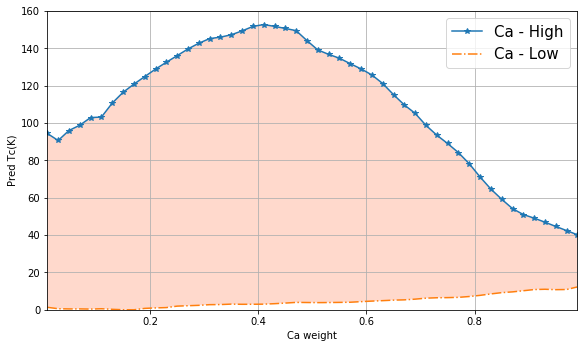

In [24]:
fig = plt.gcf( )
line1, = plt.plot(x,jilumax, '-*', label = 'Ca - High')
line2, = plt.plot(x,jilumin, '-.', label = 'Ca - Low')
plt.legend(loc="best",fontsize=15)
plt.fill_between(x, jilumax, jilumin, facecolor="orangered",alpha=0.2)
fig.set_size_inches(9.5, 5.5)
plt.xlim((x[0], x[-1]))
plt.ylim((0, 160))
plt.grid()
plt.xlabel("Ca weight")
plt.ylabel("Pred Tc(K)")

plt.savefig('Cafill.png',dpi=300,bbox_inches="tight")
plt.show()

# Cu

In [6]:
x = np.arange(100,610,10)
x= x/1000
x = list(x)
jilumax=[]
jilumin=[]

for i  in  x :   
    datat = pd.read_csv(r"./Cu/"+str(i)+"/out.csv",header=None,engine="python")
    t = datat.iloc[1:,:-1]
    t = sc.transform(t)
    clf_t_train = model.predict(t)
    maxx = clf_t_train.max()
    minn = clf_t_train.min()
    jilumax.append(maxx)
    jilumin.append(minn)
    print("Cu",i,"The max Tc is",maxx,"Min is",minn)
   

Cu 0.1 The max Tc is 92.29372 Min is 0.2552855
Cu 0.11 The max Tc is 94.51635 Min is 0.7062162
Cu 0.12 The max Tc is 96.74449 Min is 0.76417935
Cu 0.13 The max Tc is 102.603935 Min is 0.69127095
Cu 0.14 The max Tc is 106.359276 Min is 0.74732053
Cu 0.15 The max Tc is 108.33612 Min is 0.66289055
Cu 0.16 The max Tc is 109.89799 Min is 0.559922
Cu 0.17 The max Tc is 115.92762 Min is 0.6351006
Cu 0.18 The max Tc is 118.871376 Min is 0.8688652
Cu 0.19 The max Tc is 118.95755 Min is 1.0613906
Cu 0.2 The max Tc is 121.38755 Min is 1.2872578
Cu 0.21 The max Tc is 122.70626 Min is 1.4927614
Cu 0.22 The max Tc is 127.66948 Min is 1.8464236
Cu 0.23 The max Tc is 132.41408 Min is 2.2803848
Cu 0.24 The max Tc is 133.07336 Min is 2.6906977
Cu 0.25 The max Tc is 134.01894 Min is 3.1014028
Cu 0.26 The max Tc is 138.34213 Min is 3.375552
Cu 0.27 The max Tc is 139.38943 Min is 3.6326761
Cu 0.28 The max Tc is 139.12572 Min is 4.094739
Cu 0.29 The max Tc is 138.93596 Min is 4.5344834
Cu 0.3 The max Tc is 

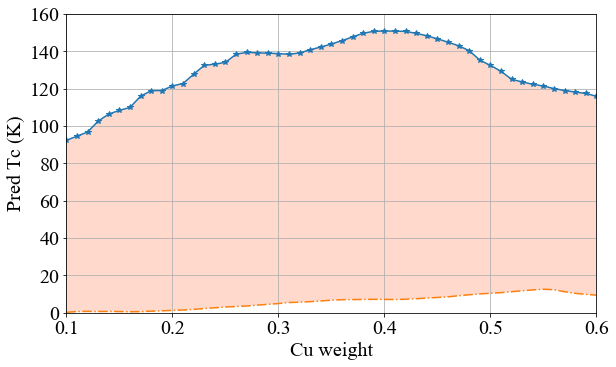

In [18]:
##重新画图

font2 = {'family' : 'Times New Roman',
    'weight' : 'normal',
    'size' : 20,
                }

fig = plt.gcf( )
line1, = plt.plot(x,jilumax, '-*')
line2, = plt.plot(x,jilumin, '-.')
#plt.legend(loc="best",font2)
plt.fill_between(x, jilumax, jilumin, facecolor="orangered",alpha=0.2)
fig.set_size_inches(9.5, 5.5)
plt.xlim((x[0], x[-1]))
plt.ylim((0, 160))
plt.grid()
plt.xticks(fontproperties = 'Times New Roman', size = 20)
plt.yticks(fontproperties = 'Times New Roman', size = 20)
plt.xlabel("Cu weight",font2)
plt.ylabel("Pred Tc (K)",font2)

plt.savefig('Cufill2021.png',dpi=300,bbox_inches="tight")
plt.show()

In [ ]:
x = np.arange(100,610,10)
x= x/1000
x = list(x)

Cu 0.4 The max Tc is 150.794


D:\py soft\conda\lib\site-packages\ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
D:\py soft\conda\lib\site-packages\seaborn\distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


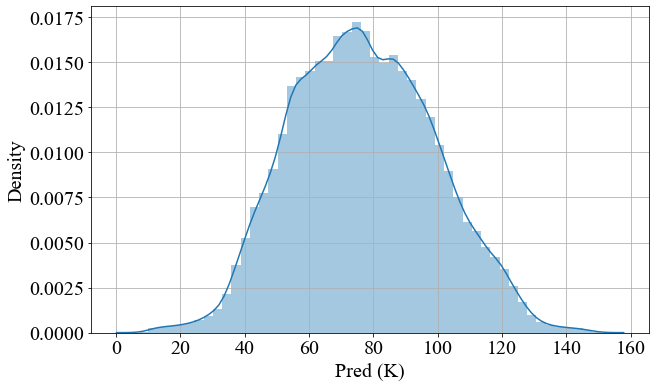

In [20]:
#print(x)
x = [0.37,0.38,0.39,0.40,0.41,0.42,0.43]
x = [0.4]    
jilu=[]
for i  in  x :   
    datat = pd.read_csv(r"./Cu/"+str(i)+"/out.csv",header=None,engine="python")
    t = datat.iloc[1:,:-1]
    t = sc.transform(t)
    clf_t_train = model.predict(t)

    
    maxx = clf_t_train.max()
    jilu.append(maxx)
    print("Cu",i,"The max Tc is",maxx)

    s = clf_t_train
    s = pd.DataFrame(s)
    s.columns = ["pre"]

    fig = plt.figure(figsize = (10,6))
    plt.xticks(fontproperties = 'Times New Roman', size = 20)
    plt.yticks(fontproperties = 'Times New Roman', size = 20)

    ax = fig.add_subplot(1,1,1)  
    sns.distplot(s,ax = ax,bins = 50)
    #plt.legend(["Pred Tc in VH with Cu"+str(i)])
    plt.xlabel('Pred (K)',font2)
    plt.ylabel('Density',font2)
   # plt.title('Pred of VH')
    plt.grid()
    plt.savefig('./HV'+str(i)+'Cu2021.jpg', dpi=300)

    #clf_t_train = pd.DataFrame(clf_t_train)
    #clf_t_train.to_csv('./'+str(i)+'Cu.csv')
    
    plt.show()


In [27]:
clf_t_train

array([[84.35001 ],
       [82.19693 ],
       [74.036644],
       ...,
       [59.676502],
       [54.26345 ],
       [59.079437]], dtype=float32)

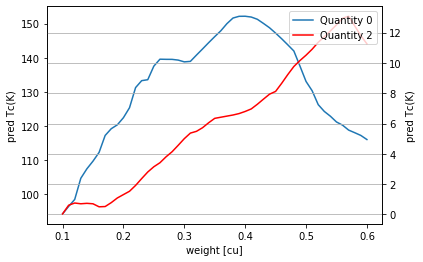

In [21]:
import numpy as np
import matplotlib.pyplot as plt


fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x,jilumax, '-', label = 'Quantity 0')

ax2 = ax.twinx()
ax2.plot(x,jilumin, '-r', label = 'Quantity 2')
fig.legend(loc=1, bbox_to_anchor=(1,1), bbox_transform=ax.transAxes)

ax.set_xlabel("weight [cu]")
ax.set_ylabel(r"pred Tc(K)")
ax2.set_ylabel(r"pred Tc(K)")
plt.grid()
plt.savefig('xxxxxx.png')

In [25]:
clf = model 
from matplotlib import pyplot as plt
#plt.scatter(x,jilu)
ax = plt.gca()
ax.set_xlabel('Ba')
ax.set_ylabel('Tc')
plt.title('Ba-DNN')
fig = plt.gcf( )
fig.set_size_inches(5.5, 10.5)


ax.plot(x,jilu, color='b', linewidth=1, alpha=0.6)
plt.savefig('DNNBa0-3', dpi=300)

[94.36172,
 90.610985,
 95.94806,
 98.78408,
 102.87587,
 103.12859,
 110.62219,
 116.38642,
 120.75509,
 124.78402,
 128.80286,
 132.47308,
 136.00774,
 139.58759,
 142.65125,
 145.13094,
 145.91302,
 147.17416,
 149.24161,
 151.64282,
 152.65012,
 151.68117,
 150.5619,
 149.39569,
 144.06607,
 139.07231,
 136.70718,
 134.64073,
 131.72186,
 128.92082,
 125.68613,
 121.103935,
 115.14979,
 109.63772,
 105.1313,
 98.72377,
 93.46362,
 88.99917,
 84.12603,
 78.17535,
 71.103,
 64.60723,
 59.161312,
 54.155666,
 50.967278,
 49.047832,
 46.880043,
 44.61198,
 42.389038,
 40.14021]